# Data Logging
## PH 212
### May 11 2021
### Zachary Bochanski

Collecting data from DS18B20 sensor and analyzing using pandas. The project uses a microcontroller breakout board with a wifi chip, [board info](https://en.wikipedia.org/wiki/ESP32). The goal is to send the readings from the temp sensor over the local network and be able to download the the csv.

- sweet open source package for integrating IoT stuffs with VScode: [platformio](https://platformio.org/)

View and download data here:
## [DS18B20 Data Viewer](https://ph212-iot.web.app/)

## Requirements

Recording Tools 
- [Data Logging](https://github.com/ztbochanski/PH212-Data-Logging)

Analytical Tools
- `numpy`
- `pandas`
- `matplotlib`


In [1]:
import numpy as np
import pandas as pd
import matplotlib as mplot
import matplotlib.pyplot as plt
from numpy.polynomial import polynomial as ply

## Reading CSV with Pandas

- Use pandas static method `read_csv()`

- Download CSV from [DS18B20 Data Viewer](https://ph212-iot.web.app/), place in project directory


In [2]:
data = pd.read_csv('data/ds18b20_data.csv')
# rename comumns
df = data.rename(columns=lambda x: x.strip())
df = df.assign(parsed_time=lambda x: pd.to_datetime(x.time, infer_datetime_format=True) )
# data time series
parsed_time = df['parsed_time']
# data temp series
data_temp = df['measurement']

# display 
df.head(5)

,id,measurement,time,parsed_time
0,-M_SK_aoemvXEzs7iqnq,75.0000,"Tue, 11 May 2021 21:30:10 GMT",2021-05-11 21:30:10
1,-M_SKc1ZW-QAO2_Yun6u,75.1250,"Tue, 11 May 2021 21:30:20 GMT",2021-05-11 21:30:20
2,-M_SKekas7K-D9QtY59U,74.8125,"Tue, 11 May 2021 21:30:30 GMT",2021-05-11 21:30:30
3,-M_SKhBasJ0rJfqn8EpF,74.5000,"Tue, 11 May 2021 21:30:41 GMT",2021-05-11 21:30:41
4,-M_SKjMdI4usfjNNMMhX,74.5000,"Tue, 11 May 2021 21:30:50 GMT",2021-05-11 21:30:50


## Plotting

- Plot with `matplotlib`
- specifically use `[time]` header and `[measurement]` header for x and y axes.

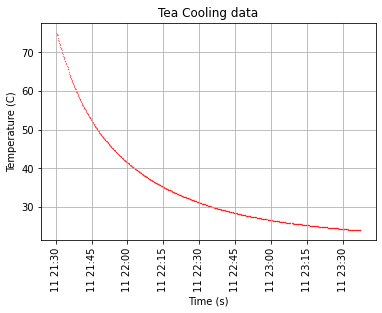

In [19]:
# create plot
fig, ax = plt.subplots()
ax.scatter(parsed_time, data_temp, s=.05, c='red')

plt.rcParams.update({'font.size': 10}) # make labels easier to read
plt.xticks(rotation='vertical')
ax.set(xlabel='Time (s)', ylabel='Temperature (C)',
       title='Tea Cooling data')
ax.grid()
plt.show()

## Summary

- Record data to database using the temp logger
- Download csv from server
- ETL (extract transform load) data using `pandas`
- Plot representation of temperature over time